In this notebook, 'requests' and 'BeautifulSoup' are used to scrape the novel - 'The Three Musketeers' from the Project Gutenberg website. After scraping and cleaning the text data, NLP is used to find the most frequent words occuring in the novel.

### Importing libraries and packages

In [37]:
pip install wordcloud

     ------------------------------------ 153.1/153.1 kB 240.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [38]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Request for 'The Three Musketeers' html file from Project Gurtenburg

In [5]:
# Get The Three Musketeers html page on request object
req=requests.get('https://www.gutenberg.org/files/1257/1257-h/1257-h.htm')

# Encode the html page text
req.encoding='utf-8'

# Extract the html from the request object
html=req.text

#Preview a section of the html
print(html[1000:2000])

: avoid;} /* for epubs */

div.chapter {page-break-before: always; margin-top: 4em;}

p {text-indent: 1em;
   margin-top: 0.25em;
   margin-bottom: 0.25em; }

.p2 {margin-top: 2em;}

p.poem {text-indent: 0%;
        margin-left: 10%;
        font-size: 90%;
        margin-top: 1em;
        margin-bottom: 1em; }

p.letter {text-indent: 0%;
          margin-left: 10%;
          margin-right: 10%;
          margin-top: 1em;
          margin-bottom: 1em; }

p.noindent {text-indent: 0% }

p.center  {text-align: center;
           text-indent: 0em;
           margin-top: 1em;
           margin-bottom: 1em; }

p.right {text-align: right;
         margin-right: 10%;
         margin-top: 1em;
         margin-bottom: 1em; }

p.pfirst {text-indent: 0 }

.small-caps       { font-variant: small-caps }

span.dropcap      { float: left; margin: 0 0.1em 0 0; line-height: 1 }
span.dropspan     { font-variant: small-caps }

p.footnote {font-size: 90%;
          


### Get the text from the HTML using BeautifulSoup

Create a Beautiful Soup object from the html. This is done by passing the html to the BeautifulSoup() function. The Beautiful Soup package is used to parse the html, that is, take the raw html text and break it into Python objects.

In [43]:
soup=BeautifulSoup(html,'html.parser')


text=soup.get_text()
text[:2000]

'\n\n\n\n\nThe Project Gutenberg eBook of The Three Musketeers, by Alexandre Dumas, Père\n\n\n\nThe Project Gutenberg eBook of The Three Musketeers, by Alexandre Dumas, Père\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online\r\nat www.gutenberg.org. If you\r\nare not located in the United States, you will have to check the laws of the\r\ncountry where you are located before using this eBook.\r\n\nTitle: The Three Musketeers \nAuthor: Alexandre Dumas, Père\nRelease Date: March 01, 1998 [eBook #1257]\r\n[Most recently updated: April 14, 2022]\nLanguage: English\nCharacter set encoding: UTF-8\nProduced by: John P. Roberts III, Roger Labbe, Scott David Gray, Sue Asscher, Anita Martin, David Muller and David Widger.\n*** START OF THE PROJECT GUTENBER

In [44]:
text=text.replace('\n','')
text[:2000]

'The Project Gutenberg eBook of The Three Musketeers, by Alexandre Dumas, PèreThe Project Gutenberg eBook of The Three Musketeers, by Alexandre Dumas, Père\rThis eBook is for the use of anyone anywhere in the United States and\rmost other parts of the world at no cost and with almost no restrictions\rwhatsoever. You may copy it, give it away or re-use it under the terms\rof the Project Gutenberg License included with this eBook or online\rat www.gutenberg.org. If you\rare not located in the United States, you will have to check the laws of the\rcountry where you are located before using this eBook.\rTitle: The Three Musketeers Author: Alexandre Dumas, PèreRelease Date: March 01, 1998 [eBook #1257]\r[Most recently updated: April 14, 2022]Language: EnglishCharacter set encoding: UTF-8Produced by: John P. Roberts III, Roger Labbe, Scott David Gray, Sue Asscher, Anita Martin, David Muller and David Widger.*** START OF THE PROJECT GUTENBERG EBOOK THE THREE MUSKETEERS ***The Three Musketeers

### Extract the words in the text using Tokenization

In [22]:
# Create a tokenizer
tokenizer=nltk.tokenize.RegexpTokenizer('\w+')

# Tokenize the text using the tokenizer
tokens=tokenizer.tokenize(text)
tokens[10:20]

['Dumas',
 'PèreThe',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'The',
 'Three',
 'Musketeers',
 'by']

In [24]:
# Convert the words to lowercase and append to words
words=[]

for word in tokens:
    words.append(word.lower())

words[:10]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'the',
 'three',
 'musketeers',
 'by',
 'alexandre']

### Remove the stop words

In [27]:
# Getting the English stop words
sw_list=stopwords.words('english')
sw_list[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [29]:
# Add the non stopwords into a new list
words_clean=[]

for word in words:
    if word not in sw_list:
        words_clean.append(word)

words_ns[:10]

['project',
 'gutenberg',
 'ebook',
 'three',
 'musketeers',
 'alexandre',
 'dumas',
 'pèrethe',
 'project',
 'gutenberg']

### Find the frequency of the words

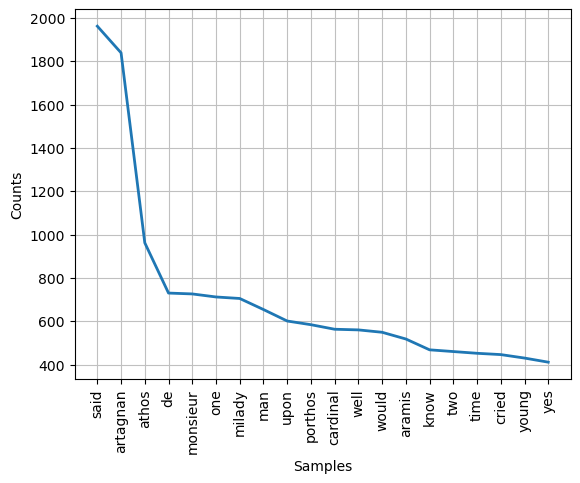

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [31]:
# Creating frequency distribution
freqdist=nltk.FreqDist(words_clean)

# Plot the 20 most common words in the text
freqdist.plot(20)

In [32]:
#Update the stopwords list
sw_list.extend(["said","one","like","well","two","yes","upon","would"])

clean_words=[]

#Iterate through the words_clean list and add non stopwords to the new clean_words list
for word in words_clean:
    if word not in sw_list:
        clean_words.append(word)

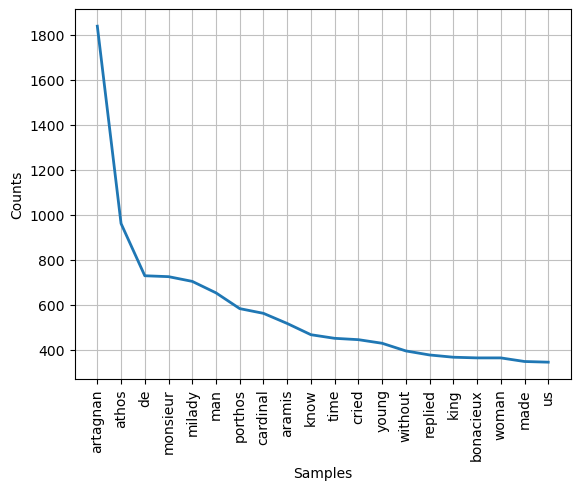

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [33]:
# Find frequency of words
freqdist=nltk.FreqDist(clean_words)

# Plot the 20 most common words in the text
freqdist.plot(20)

### 

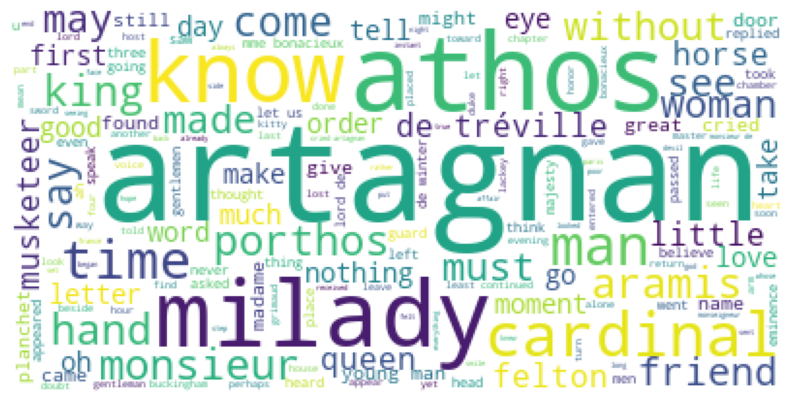

In [41]:
# Convert word list to a single string
clean_words_string = " ".join(clean_words)

# Generate the wordcloud
wordcloud = WordCloud(background_color="white").generate(clean_words_string)

# Plot the wordcloud
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)

# Remove the axis value
plt.axis("off")
plt.show()